In [58]:
import numpy as np
import math
from scipy.stats import norm
import time
import pandas as pd
import statsmodels.api as sm
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.models import Sequential
from matplotlib import pyplot as plt

%matplotlib inline

In [49]:
# Transmited label data file
from google.colab import files
import io
#number of receiverd particle
uploadedy = files.upload()

Saving x_y.csv to x_y (2).csv


In [50]:
data = pd.read_csv('x_y.csv')

In [51]:
X = data['X']
Y = data["Y"]

In [52]:
print(X)

0           0.0
1           0.0
2           0.0
3           0.0
4           1.0
         ...   
5495    10653.0
5496    10527.0
5497    10809.0
5498    10797.0
5499    10696.0
Name: X, Length: 5500, dtype: float64


In [53]:
X = np.array(data['X'])
X = np.reshape(X, (5500,1))
Y = np.array(data['Y'])
Y = np.reshape(Y, (5500,1))

In [54]:
from keras.optimizers import Adam
model = Sequential()

model.add(Dense(5, input_dim=1, activation='tanh'))
for i in range(8):
  model.add(Dense(5, input_dim=5, activation='tanh'))
model.add(Dense(1, input_dim=5, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [55]:
mymodel = model.fit(X[:3000],Y[:3000],epochs=50,batch_size=10)
scores = model.evaluate(X, Y)
print(model.metrics_names)
print(scores)

Epoch 1/50
300/300 [==============================] - 1s 1ms/step - loss: 0.6863 - accuracy: 0.5635
Epoch 2/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5200
Epoch 3/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5505
Epoch 4/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5330
Epoch 5/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5481
Epoch 6/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5479
Epoch 7/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5442
Epoch 8/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5485
Epoch 9/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5297
Epoch 10/50
300/300 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5528

dict_keys(['loss', 'accuracy'])


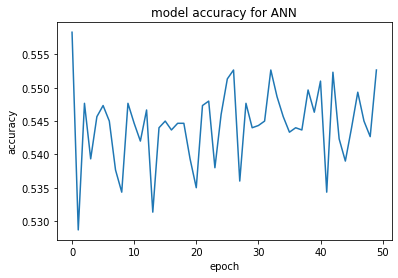

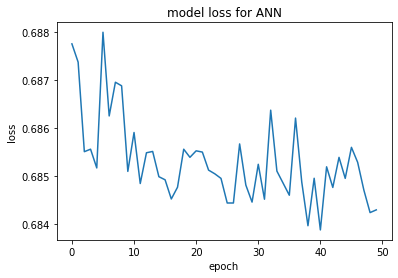

In [56]:
print(mymodel.history.keys())
# summarize history for accuracy
plt.plot(mymodel.history['accuracy'])
# plt.plot(mymodel.history['val_accuracy'])
plt.title('model accuracy for ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('ann_accu')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
 #summarize history for loss
plt.plot(mymodel.history['loss'])
# plt.plot(mymodel.history['val_loss'])
plt.title('model loss for ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('ann_loss')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 0.9275 - accuracy: 0.0400
At SNR = -5
accuracy: 4.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.9161 - accuracy: 0.0800
At SNR = -4
accuracy: 8.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.9019 - accuracy: 0.1300
At SNR = -3
accuracy: 13.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.8991 - accuracy: 0.1400
At SNR = -2
accuracy: 14.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.9104 - accuracy: 0.1000
At SNR = -1
accuracy: 10.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.8877 - accuracy: 0.1800
At SNR = 0
accuracy: 18.00%
4/4 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.2600
At SNR = 1
accuracy: 26.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.2900
At SNR = 2
accuracy: 29.00%
4/4 [==============================] - 0s 3ms/step - loss: 0.8366 - accuracy: 0.3600
At SNR =

No handles with labels found to put in legend.


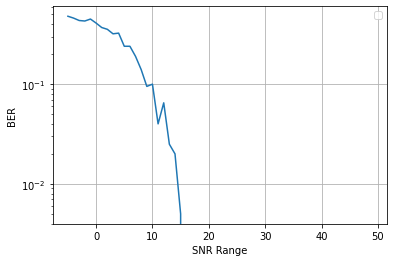

In [57]:
pd_FM = {}
idx=0
X_FM_lb=[]
for snr in range(-5, 50, 1):
  X_FM_lb.append(X[idx:idx+100])
  idx=idx+100

#print(X_FM_lb)


for snr in range(-5, 50, 1):
  y_snr = np.ones((X_FM_lb[snr+5].shape[0], 1))
  scores = model.evaluate(X_FM_lb[snr+5], y_snr)
  # print(scores)
  print("At SNR = " + str(snr) + "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  pd_FM[snr] =(1- scores[1])/2
  
plt.plot(range(-5, 50, 1), list(pd_FM.values()))

# printing the graph
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('BER')
plt.grid()
plt.savefig('ann_orig')
plt.legend(loc='upper right',ncol = 1)
plt.savefig('snip')
plt.show()